# PCA

In [1]:
# To get rid of overfitting


# unsupervisied learning
# no lablled data
# no test_train_split
# everything foes under testing no training

# Steps:
    # variance, co-variance of two columns is campared
    # Feature scaling:
    #     standardization


In [2]:
import pandas as pd

In [4]:
df = pd.read_csv("C:/Users/Welcome/Downloads/data.csv")
df

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17
...,...,...,...,...,...,...,...,...,...,...,...
62179,23,2017-03-18 18:42:28-07:00,67348,5,1,0,61.07,0,1,3,18
62180,21,2017-03-18 18:52:35-07:00,67955,5,1,0,61.07,0,1,3,18
62181,25,2017-03-18 19:02:40-07:00,68560,5,1,0,56.71,0,1,3,19
62182,18,2017-03-18 19:12:47-07:00,69167,5,1,0,56.71,0,1,3,19


In [5]:
df.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


In [7]:
df.isnull().sum()

number_people           0
date                    0
timestamp               0
day_of_week             0
is_weekend              0
is_holiday              0
temperature             0
is_start_of_semester    0
is_during_semester      0
month                   0
hour                    0
dtype: int64

<Axes: >

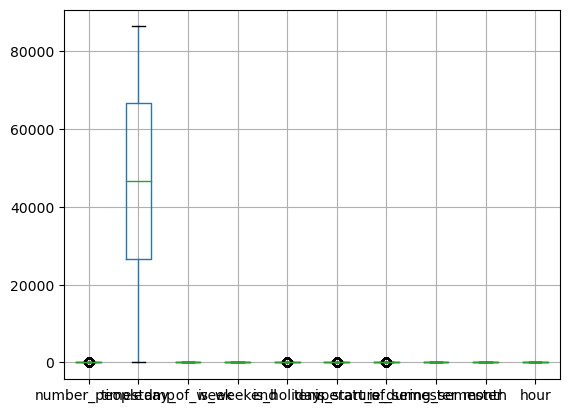

In [10]:
df.boxplot()

In [14]:
df1 = df.drop("date",axis=1)
df1

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,61211,4,0,0,71.76,0,0,8,17
1,45,62414,4,0,0,71.76,0,0,8,17
2,40,63015,4,0,0,71.76,0,0,8,17
3,44,63616,4,0,0,71.76,0,0,8,17
4,45,64217,4,0,0,71.76,0,0,8,17
...,...,...,...,...,...,...,...,...,...,...
62179,23,67348,5,1,0,61.07,0,1,3,18
62180,21,67955,5,1,0,61.07,0,1,3,18
62181,25,68560,5,1,0,56.71,0,1,3,19
62182,18,69167,5,1,0,56.71,0,1,3,19


In [30]:
x = df1.iloc[:,1:8] #df.iloc(rows,columns)
y = df1.iloc[:,0] #':'-> indicates all the rows and 0->first column
x

,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester
0,61211,4,0,0,71.76,0,0
1,62414,4,0,0,71.76,0,0
2,63015,4,0,0,71.76,0,0
3,63616,4,0,0,71.76,0,0
4,64217,4,0,0,71.76,0,0
...,...,...,...,...,...,...,...
62179,67348,5,1,0,61.07,0,1
62180,67955,5,1,0,61.07,0,1
62181,68560,5,1,0,56.71,0,1
62182,69167,5,1,0,56.71,0,1


In [31]:
y

0        37
1        45
2        40
3        44
4        45
         ..
62179    23
62180    21
62181    25
62182    18
62183    23
Name: number_people, Length: 62184, dtype: int64

In [32]:
corr = df1.corr()
corr

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
number_people,1.000000,0.550218,-0.162062,-0.173958,-0.048249,0.373327,0.182683,0.335350,-0.097854,0.552049
timestamp,0.550218,1.000000,-0.001793,-0.000509,0.002851,0.184849,0.009551,0.044676,-0.023221,0.999077
day_of_week,-0.162062,-0.001793,1.000000,0.791338,-0.075862,0.011169,-0.011782,-0.004824,0.015559,-0.001914
is_weekend,-0.173958,-0.000509,0.791338,1.000000,-0.031899,0.020673,-0.016646,-0.036127,0.008462,-0.000517
is_holiday,-0.048249,0.002851,-0.075862,-0.031899,1.000000,-0.088527,-0.014858,-0.070798,-0.094942,0.002843
temperature,0.373327,0.184849,0.011169,0.020673,-0.088527,1.000000,0.093242,0.152476,0.063125,0.185121
is_start_of_semester,0.182683,0.009551,-0.011782,-0.016646,-0.014858,0.093242,1.000000,0.209862,-0.137160,0.010091
is_during_semester,0.335350,0.044676,-0.004824,-0.036127,-0.070798,0.152476,0.209862,1.000000,0.096556,0.045581
month,-0.097854,-0.023221,0.015559,0.008462,-0.094942,0.063125,-0.137160,0.096556,1.000000,-0.023624
hour,0.552049,0.999077,-0.001914,-0.000517,0.002843,0.185121,0.010091,0.045581,-0.023624,1.000000


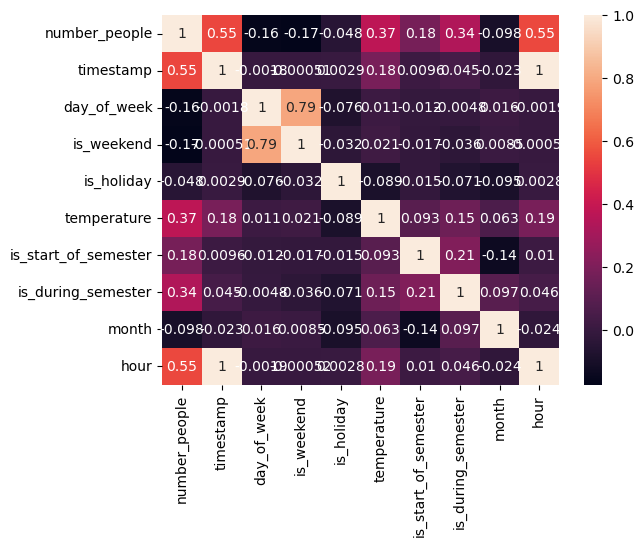

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [34]:
from sklearn.preprocessing import StandardScaler # mean = 0 and SD = 1 
scaler = StandardScaler()
scaler

StandardScaler()

In [35]:
X = scaler.fit_transform(x)
X

array([[ 0.63654993,  0.50956119, -0.6280507 , ...,  2.09027384,
        -0.29253482, -1.39393832],
       [ 0.68623792,  0.50956119, -0.6280507 , ...,  2.09027384,
        -0.29253482, -1.39393832],
       [ 0.71106127,  0.50956119, -0.6280507 , ...,  2.09027384,
        -0.29253482, -1.39393832],
       ...,
       [ 0.94008862,  1.01036016,  1.59222814, ..., -0.292433  ,
        -0.29253482,  0.71739186],
       [ 0.96515979,  1.01036016,  1.59222814, ..., -0.292433  ,
        -0.29253482,  0.71739186],
       [ 0.99010704,  1.01036016,  1.59222814, ..., -0.292433  ,
        -0.29253482,  0.71739186]])

In [36]:
y

0        37
1        45
2        40
3        44
4        45
         ..
62179    23
62180    21
62181    25
62182    18
62183    23
Name: number_people, Length: 62184, dtype: int64

# PCA

In [37]:
from sklearn.decomposition import PCA
pca = PCA()
pca

PCA()

In [38]:
pca.fit_transform(X)

array([[-0.0358806 , -0.48666187, -1.81424321, ...,  0.19423672,
         1.7452435 ,  0.87750703],
       [-0.03601716, -0.50358608, -1.84922418, ...,  0.17183603,
         1.72642302,  0.87742222],
       [-0.03608538, -0.51204115, -1.86670012, ...,  0.160645  ,
         1.7170206 ,  0.87737984],
       ...,
       [-1.81501988, -0.40713446, -0.40274896, ..., -0.06854136,
        -1.09859421, -0.43860086],
       [-1.81508878, -0.41567394, -0.42039937, ..., -0.07984411,
        -1.1080905 , -0.43864366],
       [-1.81515734, -0.42417122, -0.43796255, ..., -0.09109101,
        -1.11753985, -0.43868624]])

In [41]:
var = pca.get_covariance()
var

array([[ 1.00001608e+00, -1.79321968e-03, -5.08815704e-04,
         2.85078360e-03,  1.84852463e-01,  9.55105884e-03,
         4.46766172e-02],
       [-1.79321968e-03,  1.00001608e+00,  7.91350923e-01,
        -7.58632581e-02,  1.11689106e-02, -1.17822146e-02,
        -4.82370614e-03],
       [-5.08815704e-04,  7.91350923e-01,  1.00001608e+00,
        -3.18993471e-02,  2.06736733e-02, -1.66460432e-02,
        -3.61277725e-02],
       [ 2.85078360e-03, -7.58632581e-02, -3.18993471e-02,
         1.00001608e+00, -8.85280154e-02, -1.48581472e-02,
        -7.07995743e-02],
       [ 1.84852463e-01,  1.11689106e-02,  2.06736733e-02,
        -8.85280154e-02,  1.00001608e+00,  9.32433629e-02,
         1.52478347e-01],
       [ 9.55105884e-03, -1.17822146e-02, -1.66460432e-02,
        -1.48581472e-02,  9.32433629e-02,  1.00001608e+00,
         2.09865473e-01],
       [ 4.46766172e-02, -4.82370614e-03, -3.61277725e-02,
        -7.07995743e-02,  1.52478347e-01,  2.09865473e-01,
         1.0000160

In [42]:
exp_var = pca.explained_variance_ratio_
exp_var

array([0.25724101, 0.19763625, 0.15230994, 0.14118937, 0.11201237,
       0.11008089, 0.02953017])

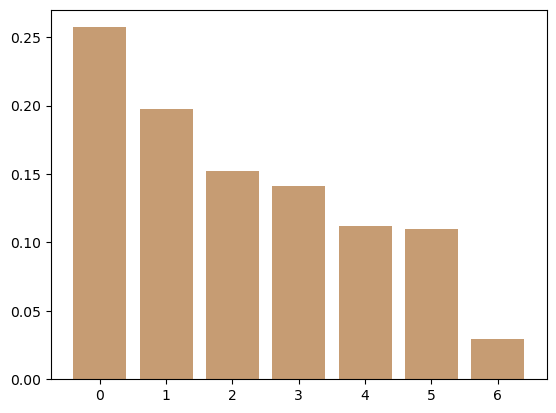

In [45]:
plt.bar(range(7), exp_var, alpha=0.5, align='center',
            label='individual explained variance')
plt.show()